# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [2]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [3]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [4]:
#Reproduzindo o modelo de Regressão Linear Simples com stats models
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           5.02e-23
Time:                        23:32:30   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Este modelo indica uma relação positiva e estatisticamente significativa entre a conta líquida e a gorjeta. Contudo, uma quantidade significativa da variação na gorjeta não é explicada pelo modelo, como evidenciado pelo valor R-quadrado de 0.333.

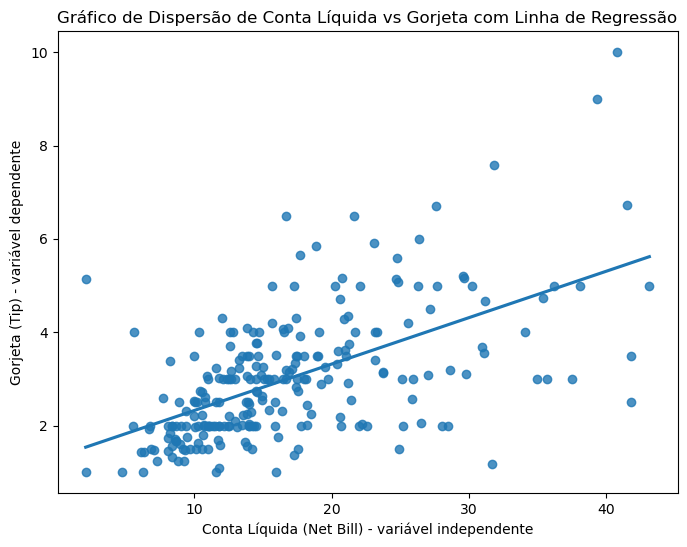

In [6]:
plt.figure(figsize=(8, 6))
sns.regplot(x='net_bill', y='tip', data=tips, ci=None)

plt.title('Gráfico de Dispersão de Conta Líquida vs Gorjeta com Linha de Regressão')
plt.xlabel('Conta Líquida (Net Bill) - variável independente')
plt.ylabel('Gorjeta (Tip) - variável dependente')
plt.show()


### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [7]:
#Reproduzindo o modelo de Regressão Linear Simples com stats models ajustado 
reg = smf.ols('net_bill ~ tip', data = tips).fit()
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               net_bill   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           5.02e-23
Time:                        23:36:53   Log-Likelihood:                -804.77
No. Observations:                 244   AIC:                             1614.
Df Residuals:                     242   BIC:                             1621.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7503      1.006      6.707      0.000       4.768       8.733
tip            3.3477      0.305     10.980      0.000       2.747       3.948
==============================================================================
Omnibus:                       58.831   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.799
Skew:                           1.185   Prob(JB):                     5.87e-27
Kurtosis:                       5.502   Cond. No.                         8.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

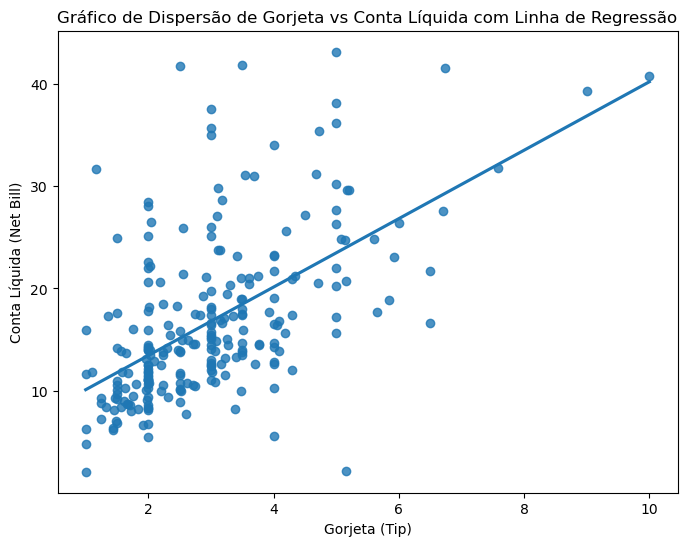

In [8]:
plt.figure(figsize=(8, 6))
sns.regplot(x='tip', y='net_bill', data=tips, ci=None)

plt.title('Gráfico de Dispersão de Gorjeta vs Conta Líquida com Linha de Regressão')
plt.xlabel('Gorjeta (Tip) variável independente')
plt.ylabel('Conta Líquida (Net Bill) - variável dependente')
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

Ambos os gráficos apresentam uma relação positiva entre as variáveis, como indicado pelas linhas de regressão ascendentes.
A distribuição dos pontos em torno das linhas de regressão parece ser semelhante, sugerindo uma variabilidade consistente nas duas variáveis em relação uma à outra.

Os valores de R-quadrado são idênticos para ambas as regressões (0.333), o que significa que a capacidade de uma variável para prever ou explicar a outra é igualmente forte em ambos os casos (proporção da variância explicada).

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [12]:
# Ajustando o modelo de RL como tip_pct sendo a variável dependente e net_bill independente
# O objetivo é entender como a porcentagem da gorjeta varia em função do valor da conta líquida.
reg = smf.ols('tip_pct ~ net_bill', data=tips).fit()

# Armazenando os valores preditos na nova coluna pred_tip_pct
tips['pred_tip_pct'] = reg.fittedvalues

# Calculando os valores preditos para 'tip' como 'pred_tip_pct' * 'net_bill'
tips['pred_tip'] = tips['pred_tip_pct'] * tips['net_bill']

# Calcular o R-quadrado para o modelo ajustado para 'tip'
# O método .fit() já calcula o R-quadrado, então podemos usá-lo diretamente
r_squared_tip = reg.rsquared

tips.head(), r_squared_tip

(   total_bill   tip     sex smoker  day    time  size   tip_pct  net_bill  \
 0       16.99  1.01  Female     No  Sun  Dinner     2  0.063204     15.98   
 1       10.34  1.66    Male     No  Sun  Dinner     3  0.191244      8.68   
 2       21.01  3.50    Male     No  Sun  Dinner     3  0.199886     17.51   
 3       23.68  3.31    Male     No  Sun  Dinner     2  0.162494     20.37   
 4       24.59  3.61  Female     No  Sun  Dinner     4  0.172069     20.98   
 
    pred_tip_pct  pred_tip  
 0      0.207087  3.309254  
 1      0.251951  2.186938  
 2      0.197684  3.461450  
 3      0.180107  3.668785  
 4      0.176358  3.699998  ,
 0.09129084920662967)

In [14]:
#Comparando o R^2 com o ptimeiro modelo
from sklearn.metrics import r2_score

# Calcular o R^2 para 'tip' usando a função r2_score
r_squared_tip_actual = r2_score(tips['tip'], tips['pred_tip'])

r_squared_tip_actual


0.1088997484546137

No primeiro modelo, onde tentamos prever o valor da gorjeta com base no total da conta, o nosso R^2 foi de cerca de 33.3%. Isso quer dizer que o modelo consegue explicar um terço do que acontece com as gorjetas com base no valor da conta.

No segundo modelo, começamos prevendo que parte da conta é a gorjeta (em porcentagem) e depois usamos isso para estimar o valor da gorjeta em si. Aqui, o R^2 foi só de 10.89%, o que indica que o modelo não é tão bom para explicar as gorjetas desta maneira.

Conclusão: o primeiro modelo, que olha diretamente para o valor da conta para prever a gorjeta, funciona melhor do que o segundo modelo, que tenta explicar as gorjetas a partir da porcentagem primeiro.